# Predicting Heart Disease with Machine Learning

Predicting whether a new patient might develop heart disease holds significant importance in the medical field. Cardiovascular diseases (CVDs), are the leading cause of death globally. Early identification of individuals at risk is crucial for improving outcomes and reducing the impact of CVDs. By accurately identifying those who could develop heart disease, doctors can take preventive steps and tailor treatments to individual needs. This not only enhances patient care but also reduces healthcare costs and contributes to overall public health.

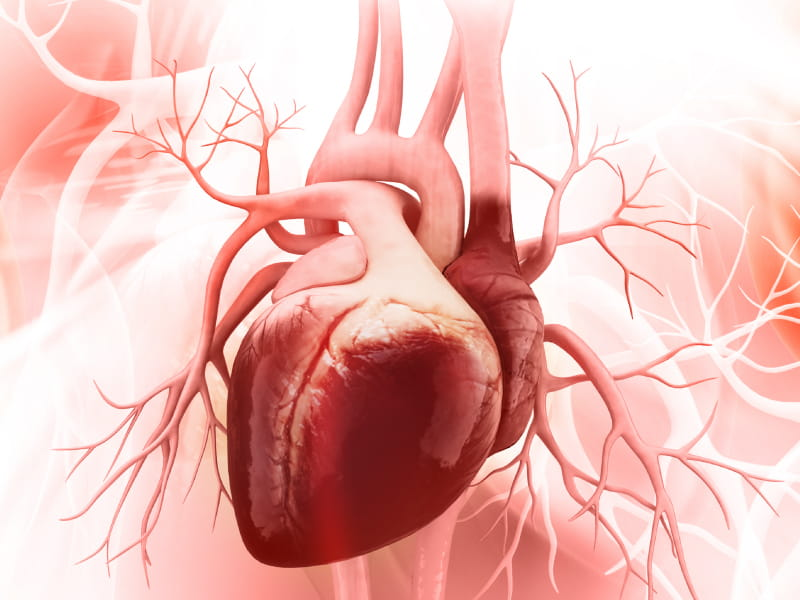
(abhijith3747, Adobe Stock)



We employed a dataset compiled from hospitals in Hungary, Switzerland, Long Beach, and Cleveland. The dataset can be accessed via this [link](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction). It encompasses crucial patient details, including personal information and medical history, including prior instances of heart disease. Our objective is to utilize this dataset to forecast the probability of a new patient developing heart disease in the future.

## Data
The dataset contains the following information:

| Name | Column Description| Format|
| :-----------: | :----------- |:-------|
|Age| Age of the patient | years
|Sex| Gender of the patient |M: Male, F: Female
|ChestPainType| Type of chest pain |TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic
|RestingBP| Resting blood pressure | mm Hg
|Cholesterol| Serum cholesterol level | mm/dl.
|FastingBS| Fasting blood sugar |1: if FastingBS > 120 mg/dl, 0: otherwise
|RestingECG| Resting electrocardiogram results |Normal: Normal, ST: ST-T wave abnormality, LVH: Left ventricular hypertrophy
|MaxHR| Maximum heart rate achieved |Numeric value between 60 and 202
|ExerciseAngina| Exercise-induced angina |Y: Yes, N: No
|Oldpeak| Oldpeak ST depression | numeric value
|ST_Slope| Slope of peak exercise ST segment |Up: upsloping, Flat: flat, Down: downsloping
|HeartDisease| Output class |1: heart disease, 0: Normal

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [2]:
# Read in the data
hd_df = pd.read_csv("heart_disease_prediction.csv")
hd_df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
# Display the information of the data
hd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
# Display the descriptive statistics for the DataFrame
hd_df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


The dataset comprises 918 observations and includes 12 distinct features, all of which have complete data. It consists of both numerical and categorical columns. It's important to highlight that the "FastingBS" and "HeartDisease" columns are represented as integers, but they essentially correspond to categorical data. 

However, there are a few values that appear suspicious. The minimum values for Cholesterol and RestingBP are both zero.  According to the [American Heart Association](https://www.heart.org/en/health-topics/cholesterol/about-cholesterol/what-your-cholesterol-levels-mean), 
_serum cholesterol "is a composite of different measurements. Your total blood cholesterol is calculated by adding your HDL and LDL cholesterol levels, plus 20% of your triglyceride level."_ Therefore, it's unlikely that cholesterol would be zero.

To address this question, let's begin by gaining a clearer understanding of our categorical data. We'll achieve this by creating visualizations to comprehend the distribution of the data.


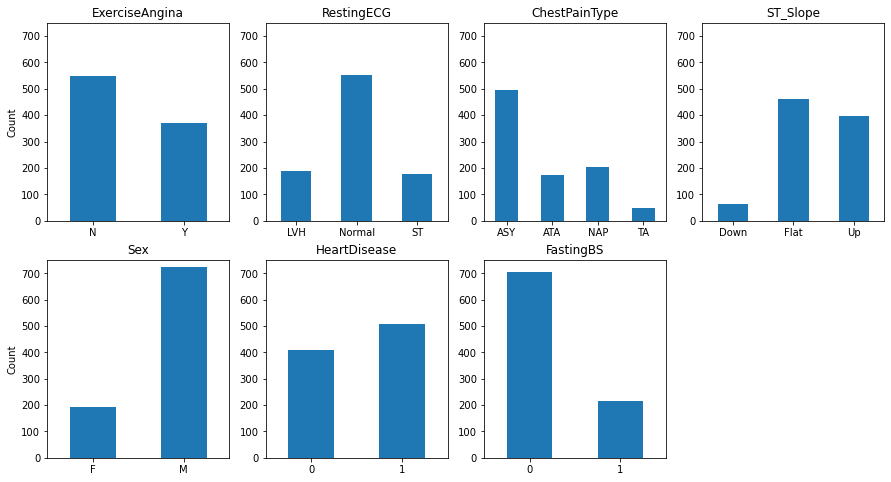

In [5]:
# For every categorical column in the dataset, including HeartDisease and FastingBS
# Create a bar chart that displays the number of rows for each category of that column.

# Filter out the categorical columns
cols = hd_df.columns
num_cols = hd_df._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))
cat_cols.append('HeartDisease')
cat_cols.append('FastingBS')
num_cat = len(cat_cols)

s1 = 2
s2 = math.ceil(num_cat/s1)

for i,col in zip(range(0,num_cat),cat_cols):
    
    # pivot the data and aggregate
    dfp = hd_df.pivot_table(index=col, aggfunc='size')
    
    # plot
    plt.subplot(s1,s2,i+1)
    dfp.plot(kind='bar', rot=0,figsize=(15, 8))
    plt.ylim([0,750])
    plt.title(col)
    plt.xlabel('')
    if ((i+1) % 4 == 1):
        plt.ylabel('Count')
    
plt.show()

Based on the bar chart above, we observed the following trends:

- The majority of patients exhibit normal resting electrocardiogram results.
- The dataset primarily comprises male patients.
- The slope of the peak exercise ST segment is mostly flat or upsloping.
- The dominant chest pain type is asymptomatic.
- Out of the 918 patients in the dataset, 410 were found not to have heart disease, while 508 patients were diagnosed with it. This relatively balanced distribution of the target variable is advantageous for training our model.
- Most patients have fasting blood sugar levels below 120 mg/dl.

In [6]:
# Filter out HeartDisease column from the list
cat_cols.pop(5)
num_cat = len(cat_cols)

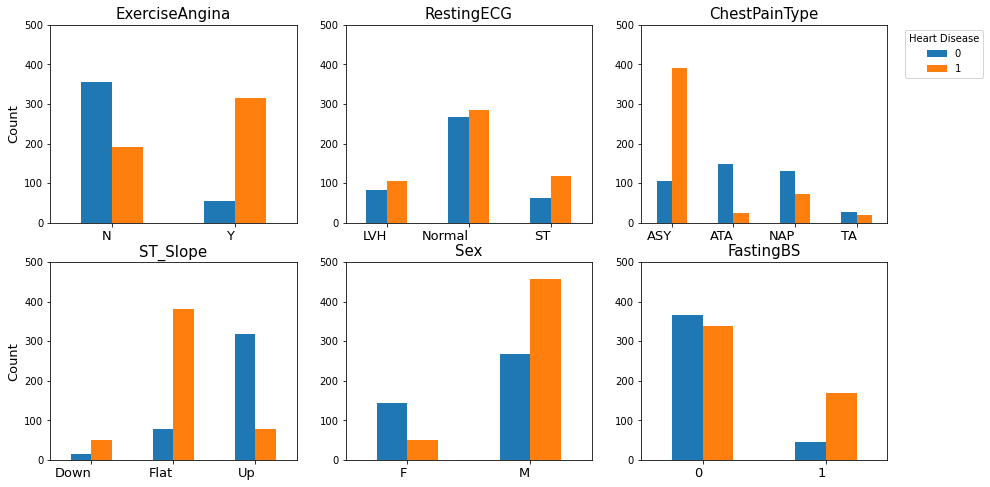

In [7]:
# Create bar charts that display the number of rows for each category of that column, grouped by HeartDisease.

# Plot settings
s1 = 2
s2 = math.ceil(num_cat/s1)
fig, axes = plt.subplots(nrows=s1, ncols=s2)

for i,col in zip(range(0,num_cat),cat_cols):
    
    # pivot the data and aggregate
    grouped = pd.pivot_table(hd_df,index=col,columns='HeartDisease',aggfunc="size")

    # plot
    ax = axes[int(i/s2),i%s2]
    grouped.plot(kind='bar',ax=ax,figsize=(15,8),legend=None)#,color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue')
    if (i%s2 == s2-1) & (int(i/s2) == 0):
        ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',title='Heart Disease')
    if (i%s2 ==0):
        ax.set_ylabel('Count',fontsize=13)
        
    ax.set_xticklabels(ax.get_xticklabels(), rotation=360, ha='right',fontsize=13)
    ax.set_ylim(0,500)
    ax.set_title(grouped.index.name,fontsize=15)
    ax.set_xlabel('')
    
plt.show()

Based on the bar plots above, we've made the following observations for each category:

1. Exercise-Induced Angina (ExerciseAngina): Individuals with exercise-induced angina have a higher likelihood of developing heart disease.

2. Gender (Sex): There are more male patients in this dataset, which could potentially induce a bias in our model and impact predictions for any female patients in any unseen data.

3. Resting Electrocardiogram Results (RestingECG): The majority of patients have normal resting electrocardiogram results. All types of resting ECG seem to share a similar likelihood of developing heart disease.

4. Slope of Peak Exercise ST Segment (ST_Slope): Patients with a flat slope of the peak exercise ST segment are significantly more likely to develop heart disease than those with an upsloping peak exercise ST segment. Although there is limited data for downsloping cases, it appears that patients with downsloping ST segments are also more likely to develop heart disease.

5. Chest Pain Type: It's essential to recognize that a notable portion of patients, who were diagnosed with heart disease, did not exhibit chest pain as a symptom (ASY). 

6. Fasting Blood Sugar (FastingBS): Patients with fasting blood sugar levels higher than 120 mg/dl are at a higher risk of developing heart disease.

## Data Cleaning
We've confirmed the absence of missing values in our dataset. Yet, as previously noted, a few columns (Cholesterol and RestingBP) contain zero values that appear inconsistent. Our next step is to determine the extent of these zero values in our dataset and take appropriate actions accordingly.

In [8]:
# Count the number of rows that have a 0 value for RestingBP.
num0_rNP = (hd_df['RestingBP'] == 0).astype(int).sum()
# Count the number of rows that have a 0 value for Cholesterol.
num0_chol = (hd_df['Cholesterol'] == 0).astype(int).sum()

print(f"Number of zeros in RestingBP column: {num0_rNP}")
print(f"Number of zeros in Cholesterol column: {num0_chol}")

Number of zeros in RestingBP column: 1
Number of zeros in Cholesterol column: 172


As there is only one zero value in the Resting BP column, we will eliminate this specific row. However, the Cholesterol column contains over a hundred rows with zero values. Deleting all of them would result in insufficient data for analysis. Therefore, we will replace these zero values with the median value of the column.

In [9]:
# Remove the row with zero RestingBP
hd_df.drop(hd_df[hd_df['RestingBP'] == 0].index, inplace=True)

# Replace rows with zero Cholesterol with the median of the column
chol_med = hd_df['Cholesterol'].median()
hd_df.loc[hd_df['Cholesterol'] == 0,'Cholesterol'] = chol_med

## Feature Selection
Following our exploratory data analysis, we have identified several features that appear to be associated with the development of heart disease. These features will be the focus of our study:
- Age
- Gender
- Chest Pain Type
- Cholesterol
- Fasting Blood Sugar

In [10]:
# Convert the categorical features into dummy variables.
hd_df = pd.get_dummies(hd_df,drop_first=True)

In [11]:
# Calculate the correlation coefficients with respect to heart disease
hd_corr = hd_df.corr()['HeartDisease'].sort_values(ascending=True)
print(f"Correlation coefficients with respect to heart disease: \n{hd_corr}")

# Calculate the correlation coefficients with respect to heart disease
hd_corr = (hd_df.corr()['HeartDisease']**2).sort_values(ascending=True)
print(f"\nSquare correlation coefficients with respect to heart disease: \n{hd_corr}")

Correlation coefficients with respect to heart disease: 
ST_Slope_Up         -0.621843
ChestPainType_ATA   -0.401680
MaxHR               -0.401410
ChestPainType_NAP   -0.215311
RestingECG_Normal   -0.092452
ChestPainType_TA    -0.054591
Cholesterol          0.043329
RestingECG_ST        0.103067
RestingBP            0.117990
FastingBS            0.267994
Age                  0.282012
Sex_M                0.305118
Oldpeak              0.403638
ExerciseAngina_Y     0.495490
ST_Slope_Flat        0.553700
HeartDisease         1.000000
Name: HeartDisease, dtype: float64

Square correlation coefficients with respect to heart disease: 
Cholesterol          0.001877
ChestPainType_TA     0.002980
RestingECG_Normal    0.008547
RestingECG_ST        0.010623
RestingBP            0.013922
ChestPainType_NAP    0.046359
FastingBS            0.071821
Age                  0.079531
Sex_M                0.093097
MaxHR                0.161130
ChestPainType_ATA    0.161346
Oldpeak              0.162924
Exe

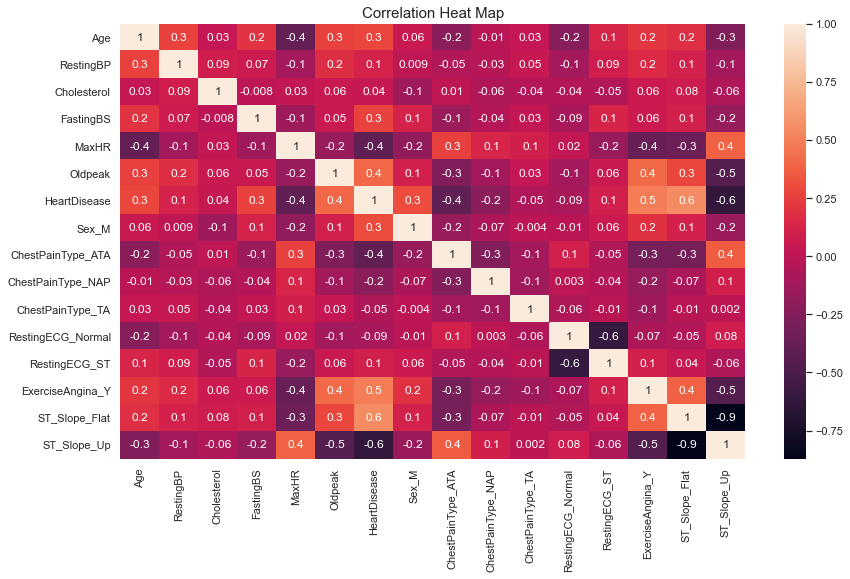

In [12]:
# Create and plot the correlation heat map
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(14,8))
sns.set_theme(style="white")
corr = hd_df.corr()
heatmap = sns.heatmap(corr, annot=True, fmt='.1g')
plt.title('Correlation Heat Map', fontsize=15)
plt.show()

Based on the correlation results, we observe that "Flat" and "Exercise-induced angina" have the highest positive correlation coefficients with respect to heart disease. Conversely, the "Upsloping" peak exercise ST segment displays a notably high negative correlation, even higher than that of "Exercise-induced angina." Additionally, "OldPeak," "ChestPainType_ATA," and "MaxHR" also exhibit relatively high correlation coefficients.

Therefore, we will include the following features in our algorithms:
- MaxHR              
- ChestPainType_ATA  
- Oldpeak            
- ExerciseAngina_Y 
- ST_Slope_Flat      
- ST_Slope_Up         

## Building Classifier

In [13]:
# Packages
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

### Single Feature Classifier

Model accuracies: 
{'MaxHR': 57.07, 'ChestPainType_ATA': 64.67, 'Oldpeak': 73.37, 'ExerciseAngina_Y': 68.48, 'ST_Slope_Flat': 80.98, 'ST_Slope_Up': 80.98}


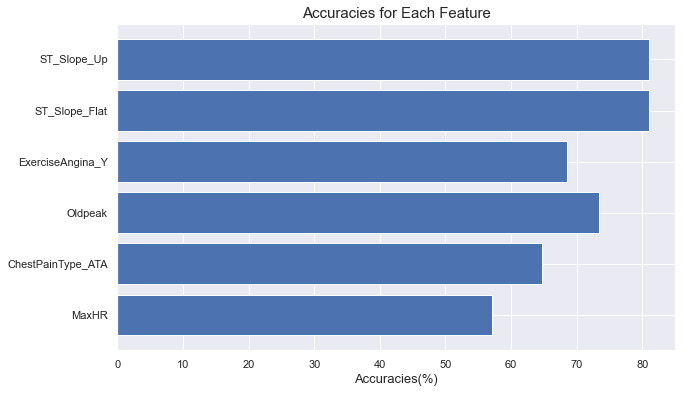

In [14]:
# Split the dataset into training and validation sets.
X = hd_df.drop("HeartDisease", axis=1)
y = hd_df["HeartDisease"]
# random_state is set to ensure reproducibility
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)

# Selected features
features = ["MaxHR",
            "ChestPainType_ATA",
            "Oldpeak",
            "ExerciseAngina_Y",
            "ST_Slope_Flat",
            "ST_Slope_Up"
           ]

accuracies = {}
# Iterate over the list
for i,ft in zip(range(0,len(features)),features):
    
    # Create a k-NN classifier.
    neigh = KNeighborsClassifier(n_neighbors=5)
    
    # Fit the model to the training data
    neigh.fit(X_train[[ft]],y_train)
    
    # Evaluate the model on the validation set.
    accuracies[ft] = round(neigh.score(X_val[[ft]],y_val)*100,2)
    
    
# Print out the acuracies of the model
print(f"Model accuracies: \n{accuracies}")
# Plot out accuraices
sns.set_theme()
plt.figure(figsize=(10,6))
plt.barh(*zip(*accuracies.items()))
plt.title('Accuracies for Each Feature',fontsize=15)
plt.xlabel('Accuracies(%)',fontsize=13)
plt.show()


Based on different numbers of nearest neighbors (n_neighbors) and the test size (test_size), we've made several observations:

1. n_neighbors = 5: Using the single feature algorithm, we found that both "ST_Slope_UP" and "ST_Slope_Flat" provide good model predictions on the validation sets, with accuracies exceeding 80%. "Oldpeak" also yields satisfactory predictions with an accuracy rate of over 70%. However, the performance of "MaxHR" is relatively lower, with an accuracy around 57%.

2. n_neighbors < 5: When we reduce the number of nearest neighbors, the performance of "ST_Slope_UP" and "ST_Slope_Flat" declines, while "Oldpeak" and "ExerciseAngina_Y" show slight improvements.

3. n_neighbors > 5: Here, the performance of "ChestPainType_ATA" significantly decreases.

4. Notably, the accuracies remain fairly consistent across different test sizes.

As a result, we have decided to proceed with:
- `test_size` = 0.2 
- `n_neighbors` = 5

### Multi-feature Classifier

In [15]:
# First normalize the different features to the same scale

# Create the scaler.
scaler = MinMaxScaler()

# Fit and transform the features in the training set using the scaler and save the output.
X_train_scaled = scaler.fit_transform(X_train)

# Transform the features in the validation set.
X_val_scaled = scaler.transform(X_val)

In [16]:
# Create a k-NN model.
neigh = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the training data on the scaled features.
neigh.fit(X_train_scaled,y_train)

# Evaluate the model on the scaled features in the validation set.
accuracy = neigh.score(X_val_scaled,y_val)

# Print the accuracy
print(f"Accuracy: {round(accuracy,2)*100}%")

Accuracy: 80.0%


The selected-feature classifier exhibits a commendable accuracy of __80%__ when tested on the validation set. This accuracy closely resembles the highest accuracy we obtained through single-feature classification. While this isn't a significant improvement compared to the model trained solely on the ST_Slope_Flat feature, it does represent a promising start.


## Hyperparameter Tuning

With our reasonably effective model in place, we are now poised to fine-tune its parameters and hyperparameters. To facilitate this, we will utilize `GridSearchCV`, a valuable tool for systematically exploring various parameter combinations. We can experiment with parameters such as:

- n_neighbors
- weights
- metric, and more.

It's important to note that GridSearchCV includes a validation set as part of its process, necessitating a slight adjustment to our workflow.



In [17]:
# Split the dataset into training and test sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)

# Create the scaler.
scaler = MinMaxScaler()
# Fit and transform the features in the training set using the scaler and save the output.
X_train_scaled = scaler.fit_transform(X_train)
# Transform the features in the validation set.
X_val_scaled = scaler.transform(X_val)

# A dictionary that stores the parameters and values to search over
parameters = {'n_neighbors': range(1,20),
              'weights':['uniform','distance'],
              'p':[1,2,5]
             }

# Instantiate a k-NN model.
neigh = KNeighborsClassifier()

# Create a GridSearchCV instance using the above model and the dictionary.
gs = GridSearchCV(neigh,parameters,scoring='accuracy')
# Fit the above instance on the scaled features and corresponding labels.
gs.fit(X_train_scaled, y_train)

# Print out the best score and the -best parameters obtained from the grid search.
best_score = gs.best_score_
best_params = gs.best_params_

print(f"Training set's best score: {best_score}")
print(f"Training set's best parameters: {best_params}")

Training set's best score: 0.8676171838598453
Training set's best parameters: {'n_neighbors': 6, 'p': 1, 'weights': 'uniform'}


We achieved a significant improvement in accuracy, increasing it by __~6.7%__, through the use of GridSearchCV for hyperparameter tuning. This process led to two key changes in our model configuration:

1. We raised the number of nearest neighbors (n_neighbors) from 5 to 6.
2. We adjusted the power parameter (p) for the Minkowski metric to 1, departing from the default value of 2.

We'll now evaluate this model on our test set. 

In [18]:
# Predict the model's output on the scaled features from the test set using the best estimate.
gs.fit(X_val_scaled, y_val)

# Print out the best score and the best parameters obtained from the grid search.
best_score = gs.best_score_
best_params = gs.best_params_

print(f"Test set's best score: {best_score}")
print(f"Test set's best parameters: {best_params}")

Test set's best score: 0.8536036036036035
Test set's best parameters: {'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}


The model's performance on the validation set dropped by 1% when compared to the training model with the best parameters. This suggests a potential issue of overfitting, where the model fits the training data too closely and struggles to generalize to new data. To mitigate overfitting, we can consider using fewer features and exploring alternative features within the dataset.

## Conclusions

Pros and Cons of Using This Model in a Real-World Healthcare Setting:

Pros:

1. Early Detection: Identifying heart disease early for timely intervention.

2. Objective Assessment: Reducing diagnostic bias and errors.

3. Efficiency: Saving healthcare providers time.

Cons:

1. False Results: Potential for false positives/negatives.

2. Data Quality: Reliability depends on data quality.

3. Lack of Personalization: Not tailored to individual circumstances.

4. Ethical Concerns: Privacy, security, and bias considerations.

5. Limited Scope: Focuses solely on heart disease.

In conclusion, while predictive models like this one offer potential benefits in early disease detection and efficiency, they should be used as a supplementary tool by healthcare professionals, rather than a definitive diagnostic tool. Proper validation, ethical considerations, and ongoing monitoring are crucial when implementing such models in a real-world healthcare setting.